In [41]:
%load_ext autoreload
%autoreload 2
import sys
import os
import jax
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from jax.typing import ArrayLike

#sys.path.append("JohnnyBotSimulator.")


# Dynamically determine the path to the JohnnyBotSimulator directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from PNT_Estimation import PNT_Estimation
from Dilution_of_Precision import DilutionOfPrecision
from Plotting.Estimation_plotting import EstimationPlotting


In [226]:
# give position, and two fixed sensor positions move one sensor along a line 
# and plot the DOP values as a function of the sensors position on the line

def plot_dop_line(position: ArrayLike, sensors, movement_matrix, num_points: int = 100, index_of_move = 0) -> None:
   
    
    line = np.linspace(sensors[2][index_of_move], sensors[2][index_of_move] + movement_matrix[2][index_of_move] *num_points, num_points)  # Generate points along the line

    # Calculate DOP values for each point on the line
    dop_values = []
    for point in line:
        sensors = sensors + movement_matrix
        print("sensors", sensors)
        dop = DilutionOfPrecision(sensors)
     
        print("dop", dop.get_dop_values_at_point(position))
        dop_values.append(dop.get_dop_values_at_point(position))


    # print position of min dop val
    min_index = np.nanargmin(dop_values)
    print("Min Dop value:", dop_values[min_index])
    print("Min sensor pos:", line[min_index])
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(line, dop_values, label='DOP', color='blue')
    plt.title('DOP of point as sensor moves')
    plt.xlabel('Sensor Position')
    plt.ylabel('DOP Value')
    plt.ylim(0,10)
    plt.grid()
    plt.legend()
    plt.show()

    return dop_values[min_index], line[min_index]


def get_Sen_3_pos(position: ArrayLike, sensors, movement_matrix, num_points: int = 100, index_of_move = 0) -> None:
    line = np.linspace(sensors[2][index_of_move], sensors[2][index_of_move] + movement_matrix[2][index_of_move] *num_points, num_points)  # Generate points along the line

    # Calculate DOP values for each point on the line
    dop_values = []
    for point in line:
        sensors = sensors + movement_matrix
        dop = DilutionOfPrecision(sensors)
        dop_values.append(dop.get_dop_values_at_point(position))


    # print position of min dop val
    min_index = np.argmin(dop_values)
    print("Min Dop value:", dop_values[min_index])
    print("Min sensor pos:", line[min_index])
    return dop_values[min_index], line[min_index]

sensors [[ 10.    10.     5.  ]
 [  5.     0.     1.  ]
 [-10.   -19.75   0.  ]]
dop 1.9352945936849886
sensors [[ 10.   10.    5. ]
 [  5.    0.    1. ]
 [-10.  -19.5   0. ]]
dop 1.9341254906144962
sensors [[ 10.    10.     5.  ]
 [  5.     0.     1.  ]
 [-10.   -19.25   0.  ]]
dop 1.9329867550783049
sensors [[ 10.  10.   5.]
 [  5.   0.   1.]
 [-10. -19.   0.]]
dop 1.9318809331726812
sensors [[ 10.    10.     5.  ]
 [  5.     0.     1.  ]
 [-10.   -18.75   0.  ]]
dop 1.9308107363062892
sensors [[ 10.   10.    5. ]
 [  5.    0.    1. ]
 [-10.  -18.5   0. ]]
dop 1.9297790523561704
sensors [[ 10.    10.     5.  ]
 [  5.     0.     1.  ]
 [-10.   -18.25   0.  ]]
dop 1.9287889576364206
sensors [[ 10.  10.   5.]
 [  5.   0.   1.]
 [-10. -18.   0.]]
dop 1.92784372974346
sensors [[ 10.    10.     5.  ]
 [  5.     0.     1.  ]
 [-10.   -17.75   0.  ]]
dop 1.926946861347121
sensors [[ 10.   10.    5. ]
 [  5.    0.    1. ]
 [-10.  -17.5   0. ]]
dop 1.9261020750026128
sensors [[ 10.    10.     

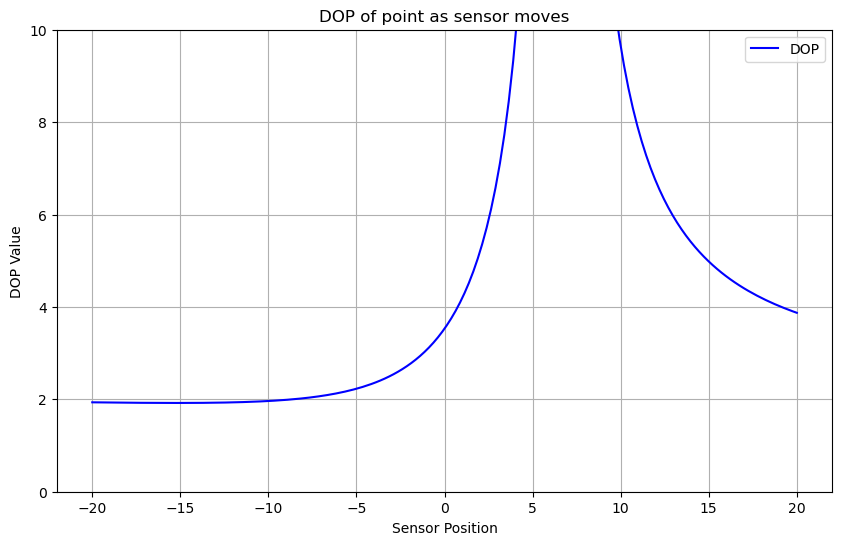

Step 1 - Min HDOP: 1.7464804338489381 at (-4, 2)
Step 2 - Min HDOP: 1.7315674969957118 at (-4, 2)
Step 3 - Min HDOP: 1.7093076160841347 at (0, 2)


c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:56: RuntimeWarning: invalid value encountered in sqrt
  pdop = np.sqrt(Q[0, 0] + Q[1, 1] + Q[2, 2])
c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:57: RuntimeWarning: invalid value encountered in sqrt
  hdop = np.sqrt(Q[0, 0] + Q[1, 1])
c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:58: RuntimeWarning: invalid value encountered in sqrt
  vdop = np.sqrt(Q[2, 2])


Step 4 - Min HDOP: 1.6737626717911596 at (0, 2)
Step 5 - Min HDOP: 1.6035163803010086 at (2, 2)
Step 6 - Min HDOP: 1.5491933384829668 at (2, 4)
Step 7 - Min HDOP: 1.455386961965889 at (4, 2)
Step 8 - Min HDOP: 1.3856406460551018 at (4, 2)
Step 9 - Min HDOP: 1.3589056238934427 at (4, 4)
Step 10 - Min HDOP: 1.3276522962746975 at (6, 2)
Step 11 - Min HDOP: 1.2878667722420931 at (6, 2)
Step 12 - Min HDOP: 1.2765694770084506 at (6, 2)


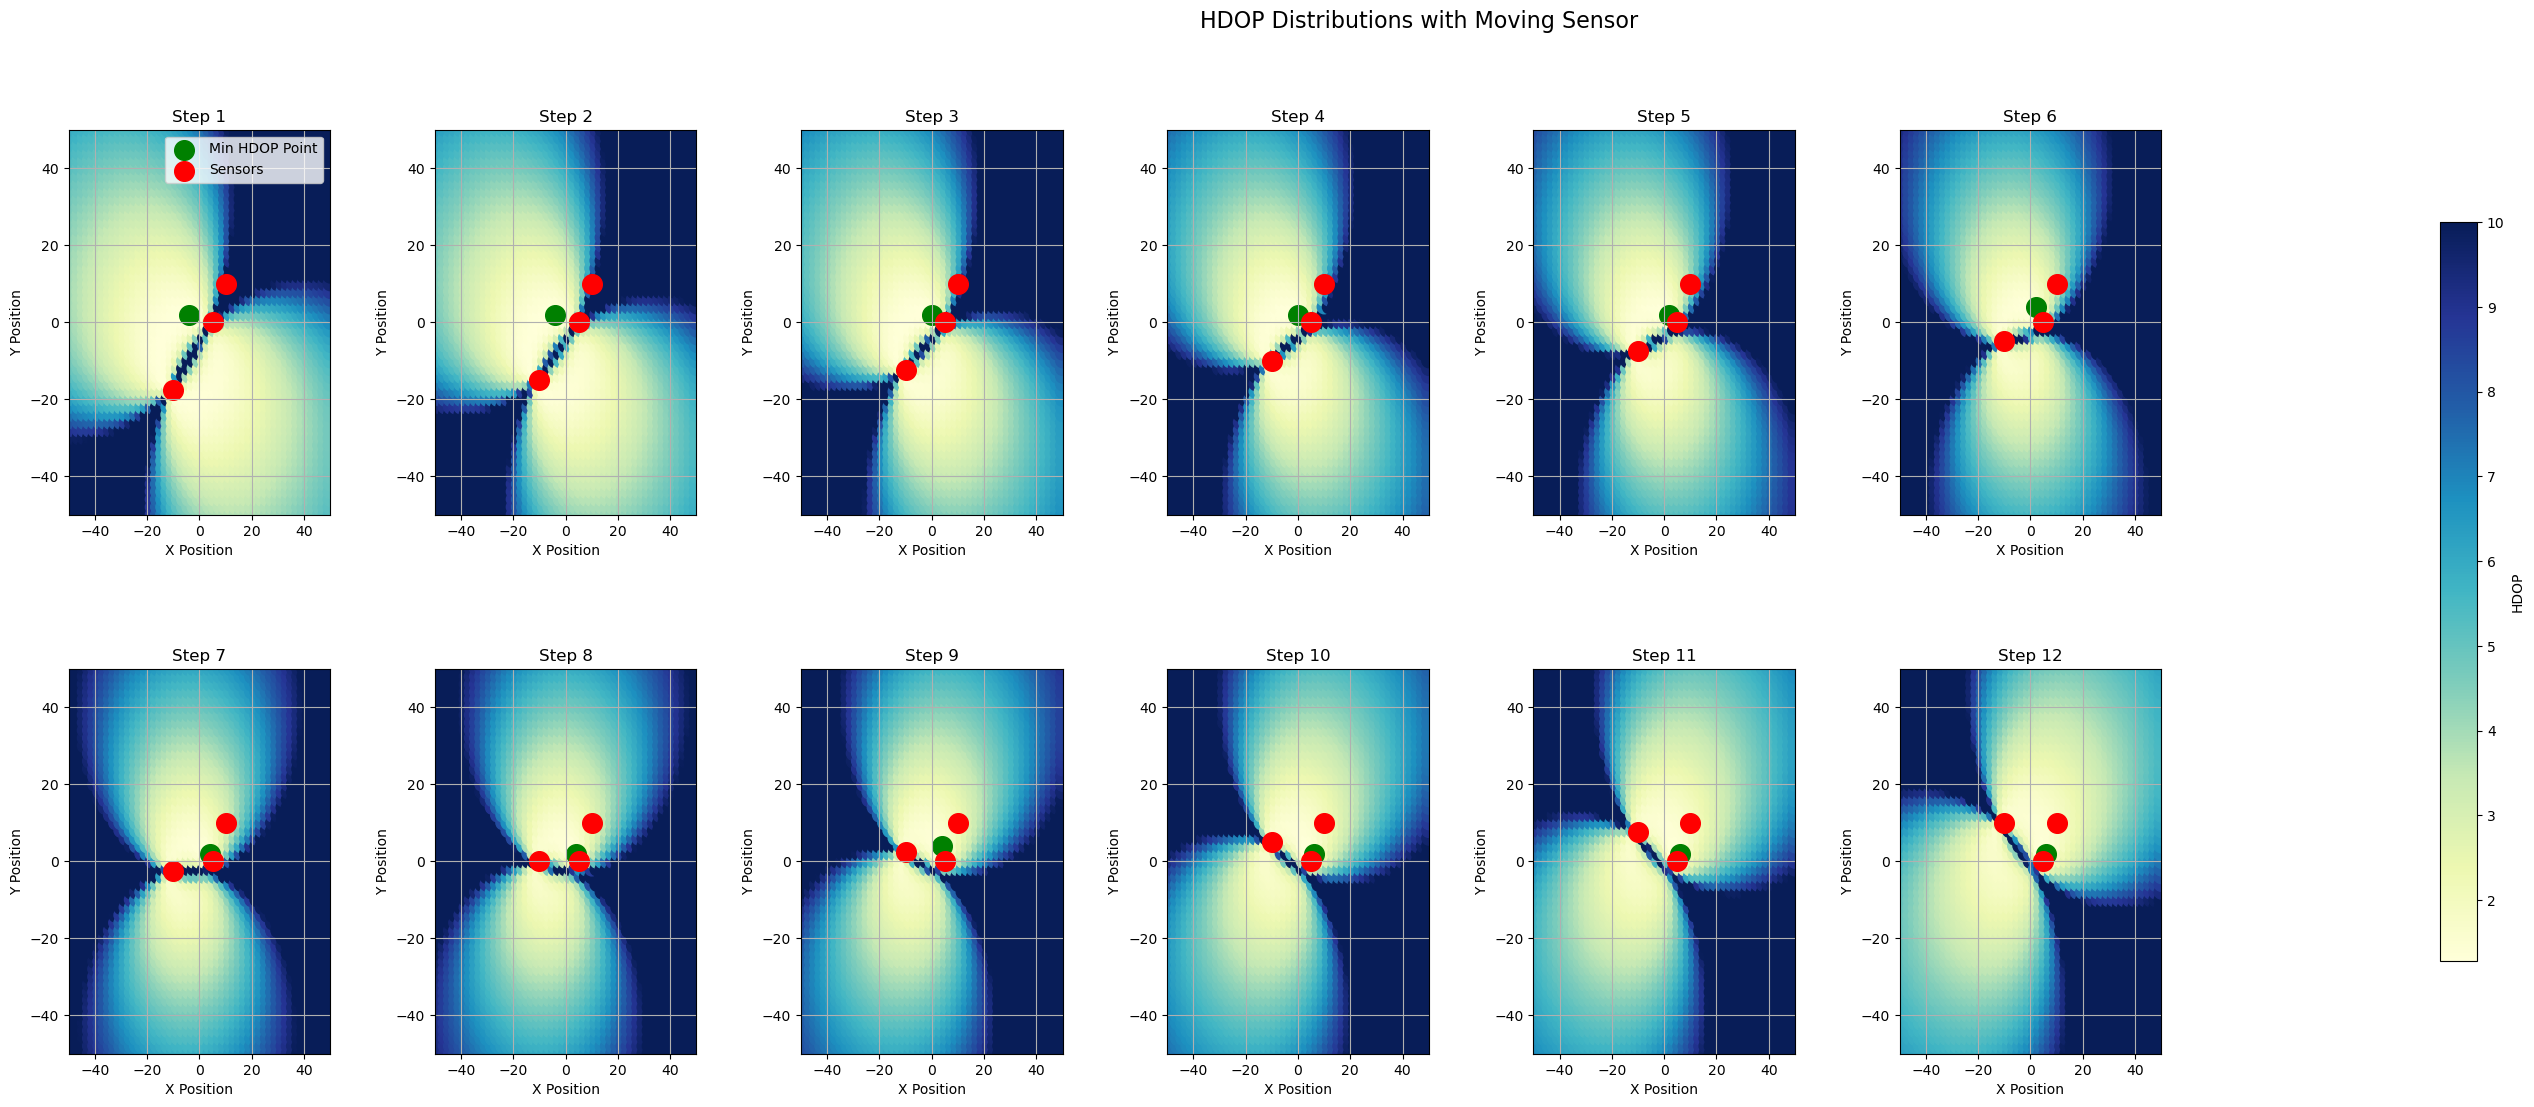

In [227]:
sensors = np.array([
    [10, 10, 5],    # Bottom-right-front corner
    [5, 0, 1],   # Top-left-back corner
    [-10, -20, 0.0]   # Top-right-back corner
])

position = np.array([0, 0, 0])  # Point to estimate
movement_matrix = np.array([
    [0, 0, 0],    # Bottom-right-front corner
    [0, 0, 0],   # Top-left-back corner
    [0,0.25 , 0]   # Top-right-back corner
])

# Call the function to plot DOP values
plot_dop_line(position, sensors, movement_matrix, num_points=160, index_of_move=1)
bound_mult = 2
x_min, x_max, y_min, y_max, z_min, z_max = -25*bound_mult, 25*bound_mult, -25*bound_mult, 25*bound_mult, -5, 20
Bounds = x_min, x_max, y_min, y_max, z_min, z_max

dop = DilutionOfPrecision(sensors=sensors,bounds=Bounds, grid_resolution=2, invert_color=False, norm=False, max_color=10)
dop.Moving_sensor(movement_matrix*10, 12)

In [228]:
def moving_position(intial_pos, movement, sensors, numpoints):
    dop_list = []
    sen_pos_list = []
    pos_list =[intial_pos]
    position = intial_pos

    line = np.linspace(position, position + movement*numpoints, numpoints)  # Generate points along the line
    for i in range(numpoints):
        position += movement
        pos_list.append(position)
        dop, pos = get_Sen_3_pos(position, sensors, movement_matrix, num_points=160, index_of_move=1)
        dop_list.append(dop)
        sen_pos_list.append(pos)

    plt.figure(figsize=(10, 6))
    plt.plot(line[:,0], sen_pos_list, label='DOP', color='blue')
    plt.title('Position of sensor vs trajectory of target agent')
    plt.xlabel('target location')
    plt.ylabel('Sensor position')
   # plt.ylim(0,10)
    plt.grid()
    plt.legend()
    plt.show()

    


Min Dop value: 1.8720207191221452
Min sensor pos: -16.47798742138365
Min Dop value: 1.8618464715915237
Min sensor pos: -15.471698113207548
Min Dop value: 1.8510124376466068
Min sensor pos: -14.716981132075471
Min Dop value: 1.8395359944618976
Min sensor pos: -13.962264150943396
Min Dop value: 1.827429613560691
Min sensor pos: -13.20754716981132
Min Dop value: 1.8147197787879137
Min sensor pos: -12.452830188679245
Min Dop value: 1.8014497081802683
Min sensor pos: -11.69811320754717
Min Dop value: 1.7876376935351643
Min sensor pos: -11.19496855345912
Min Dop value: 1.7733360427713887
Min sensor pos: -10.440251572327044
Min Dop value: 1.7585917943302705
Min sensor pos: -9.937106918238994
Min Dop value: 1.7434883031408637
Min sensor pos: -9.433962264150944
Min Dop value: 1.7280281616654565
Min sensor pos: -8.679245283018869
Min Dop value: 1.712301387977956
Min sensor pos: -8.176100628930818
Min Dop value: 1.6963835614286091
Min sensor pos: -7.6729559748427665
Min Dop value: 1.6803388088757

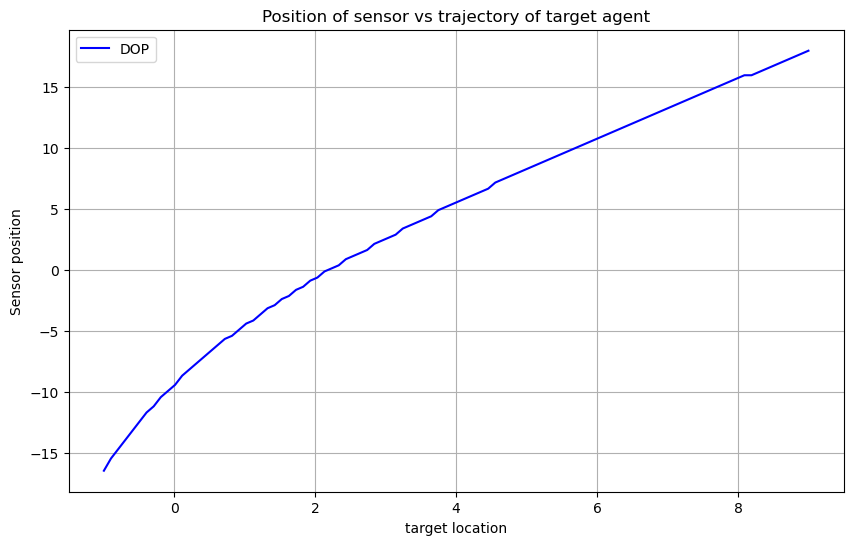

In [229]:
sensors = np.array([
    [10, 10, 5],    # Bottom-right-front corner
    [5, 0, 1],   # Top-left-back corner
    [-10, -20, 0.0]   # Top-right-back corner
])

position = np.array([1, 5, 0])  # Point to estimate
movement_matrix = np.array([
    [0, 0, 0],    # Bottom-right-front corner
    [0, 0, 0],   # Top-left-back corner
    [0,0.25 , 0]   # Top-right-back corner
])

moving_position(np.array([-1,0.0,0]), np.array([.1,.1,0]), sensors, 100)

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example vectors
a = np.array([1.0, 5.0, 10])
b = np.array([5, 1, 10])
#c = np.array([1, -10, 10])

# Normalize a and b
a_hat = a / np.linalg.norm(a)
b_hat = b / np.linalg.norm(b)
#c_hat = c / np.linalg.norm(c)

# Compute bisector and flipped unit vector v
s = a_hat + b_hat #+ c_hat
v = -s / np.linalg.norm(s)

# Compute the common angle (in degrees)
angle_deg = np.degrees(np.arccos(np.dot(a_hat, v)))

print("a_hat:", a_hat)
print("b_hat:", b_hat)
print("Optimal v (equal-angle):", v)
print(f"Common angle to a and b: {angle_deg:.2f}°")




a_hat: [0.08908708 0.4454354  0.89087081]
b_hat: [0.4454354  0.08908708 0.89087081]
Optimal v (equal-angle): [-0.27617239 -0.27617239 -0.92057462]
Common angle to a and b: 165.41°


v: [-6.58058548e-01 -7.52966764e-01 -7.93378804e-07]
v + target_pos: [-6.58058548e-01 -7.52966764e-01 -7.93378804e-07]
Third sensor vector: [-6.58058548e-01 -7.52966764e-01 -7.93378804e-07]
Position on line: [-2.62186292 -3.          0.        ]
v: [-6.58058548e-01 -7.52966764e-01 -7.93378804e-07]


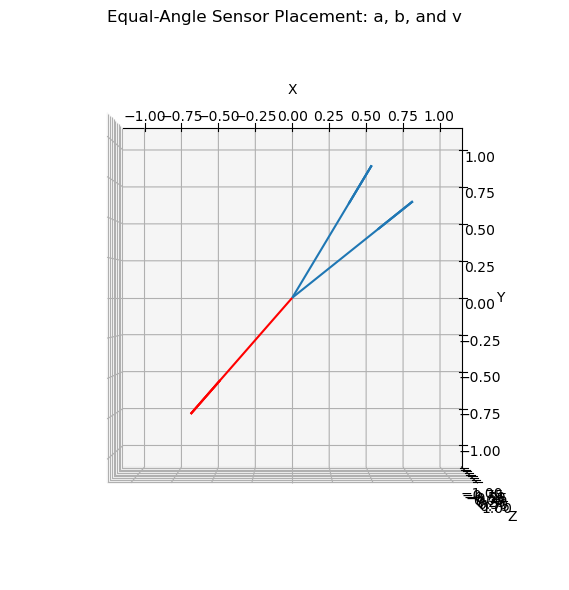

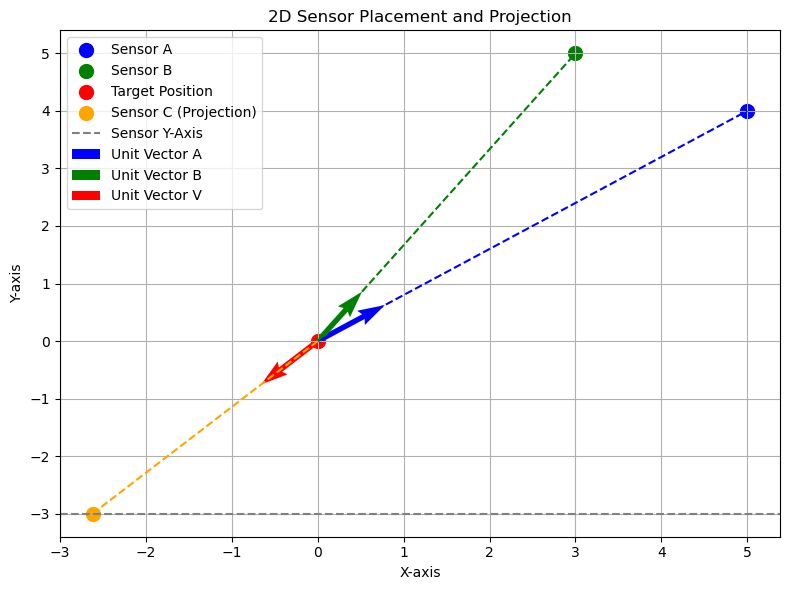

Final sensor positions: [[ 5.00000000e+00  4.00000000e+00  1.00000000e-05]
 [ 3.00000000e+00  5.00000000e+00  0.00000000e+00]
 [-2.62186292e+00 -3.00000000e+00  0.00000000e+00]]
DOP values at target position: 7.9952216930824145


In [242]:
def get_third_sensor_vec(a, b, target_pos):
    # Normalize the vectors to target_pos
    a_hat = (a-target_pos) / np.linalg.norm(a-target_pos)
    b_hat = (b-target_pos)/ np.linalg.norm(b-target_pos)

    # Compute the bisector and flipped unit vector v
    s = a_hat + b_hat
    v = -s / np.linalg.norm(s)

    print("v:", v)
    print("v + target_pos:", v + target_pos)

    #return third sensor vector from target position
    return v + target_pos

 #find where x on the line of (line_vec) [x, sensor_y_axis, 0] the sensor 3 is if you project the vector onto the line
def find_pos_on_line(sen3_vec, target_pos, sensor_y_axis = -2):
    slope = (sen3_vec[1] - target_pos[1]) / (sen3_vec[0] - target_pos[0])
    intercept = target_pos[1] - slope * target_pos[0]
    # Calculate the x-coordinate of the projection point on the line
    x_projection = (sensor_y_axis - intercept) / slope


    projection_point = np.array([x_projection, sensor_y_axis, 0])
    

    return projection_point

def plot_sensor_vec(a,b, target_pos = np.array([0, 0, 0])):
      # Normalize the vectors to target_pos
    a_hat = (a-target_pos) / np.linalg.norm(a-target_pos)
    b_hat = (b-target_pos)/ np.linalg.norm(b-target_pos)

    # Compute the bisector and flipped unit vector v
    s = a_hat + b_hat
    v = -s / np.linalg.norm(s)

    print("v:", v)

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    origin = np.zeros(3)

    #change view so we are looking down the z axis
    ax.view_init(elev=90, azim=270)

    # Plot vectors
    ax.quiver(*origin, *a_hat, length=1, normalize=True)
    ax.quiver(*origin, *b_hat, length=1, normalize=True)
    #ax.quiver(*origin, *c_hat, length=1, normalize=True)
    ax.quiver(*origin, *v, length=1, normalize=True, color='r')

    # Axis limits
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_zlim([-1.1, 1.1])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Equal-Angle Sensor Placement: a, b, and v')

    plt.tight_layout()
    plt.show()


def plot_sensor_vec_2d(a,b, v, projection_point, target_pos, sensor_y_axis):
    # Plotting in 2D
    a_hat = a / np.linalg.norm(a)
    b_hat = b / np.linalg.norm(b)

    a_hat = (a-target_pos) / np.linalg.norm(a-target_pos)
    b_hat = (b-target_pos)/ np.linalg.norm(b-target_pos)

    v = v-target_pos / np.linalg.norm(v-target_pos)


    fig, ax = plt.subplots(figsize=(8, 6))
    #create points for each sensor
    ax.scatter(a[0], a[1], color='blue', label='Sensor A', s=100)
    ax.scatter(b[0], b[1], color='green', label='Sensor B', s=100)
    ax.scatter(target_pos[0], target_pos[1], color='red', label='Target Position', s=100)
    ax.scatter(projection_point[0], projection_point[1], color='orange', label='Sensor C (Projection)', s=100)
    # Draw lines from target pos to each sensor
    ax.plot([target_pos[0], a[0]], [target_pos[1], a[1]], color='blue', linestyle='--')
    ax.plot([target_pos[0], b[0]], [target_pos[1], b[1]], color='green', linestyle='--')
    ax.plot([target_pos[0], projection_point[0]], [target_pos[1], projection_point[1]], color='orange', linestyle='--')
    # Draw the line along the x-axis at sensor_y_axis
    ax.axhline(y=sensor_y_axis, color='gray', linestyle='--', label='Sensor Y-Axis')

    #add unit vectors for each sensor from target pos
    ax.quiver(target_pos[0], target_pos[1], a_hat[0] , a_hat[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Unit Vector A')
    ax.quiver(target_pos[0], target_pos[1], b_hat[0], b_hat[1], angles='xy', scale_units='xy', scale=1, color='green', label='Unit Vector B')
    ax.quiver(target_pos[0], target_pos[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red', label='Unit Vector V')
   

    # Set limits and labels

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('2D Sensor Placement and Projection')
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.show()

    

# Example vectors
a = np.array([5, 4, 0.00001])
b = np.array([3, 5, 0])
target_pos = np.array([0, 0, 0])
sensor_y_axis = -3
# Get the third sensor vector
third_sensor_vec = get_third_sensor_vec(a, b, target_pos)
print("Third sensor vector:", third_sensor_vec)
# Find the position on the line
pos_on_line = find_pos_on_line(third_sensor_vec, target_pos, sensor_y_axis)
print("Position on line:", pos_on_line)
   
# Plot the sensor vectors and the third sensor vector
plot_sensor_vec(a, b)
    
    

plot_sensor_vec_2d(a, b, third_sensor_vec, pos_on_line, target_pos, sensor_y_axis)


final_sensors = np.array([a, b, pos_on_line])

print("Final sensor positions:", final_sensors)
dop = DilutionOfPrecision(sensors=final_sensors,bounds=Bounds, grid_resolution=2, invert_color=False, norm=False, max_color=10)

dop_values = dop.get_dop_values_at_point(target_pos)
print("DOP values at target position:", dop_values)





    
   


    

sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.9e+00 -3.0e+00  0.0e+00]]
dop 14.62660986910377
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.8e+00 -3.0e+00  0.0e+00]]
dop 14.212670403551796
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.7e+00 -3.0e+00  0.0e+00]]
dop 13.814465050888563
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.6e+00 -3.0e+00  0.0e+00]]
dop 13.431122876676607
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.5e+00 -3.0e+00  0.0e+00]]
dop 13.06183640411739
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.4e+00 -3.0e+00  0.0e+00]]
dop 12.705855953464955
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.3e+00 -3.0e+00  0.0e+00]]
dop 12.36248457757362
sensors [[ 5.0e+00  1.0e+00  0.0e+00]
 [ 0.0e+00  5.0e+00  1.0e-04]
 [-9.2e+00 -3.0e+00  0.0e+00]]
dop 12.031073521645286
sensors [[ 5.0e+00  1.0e+00

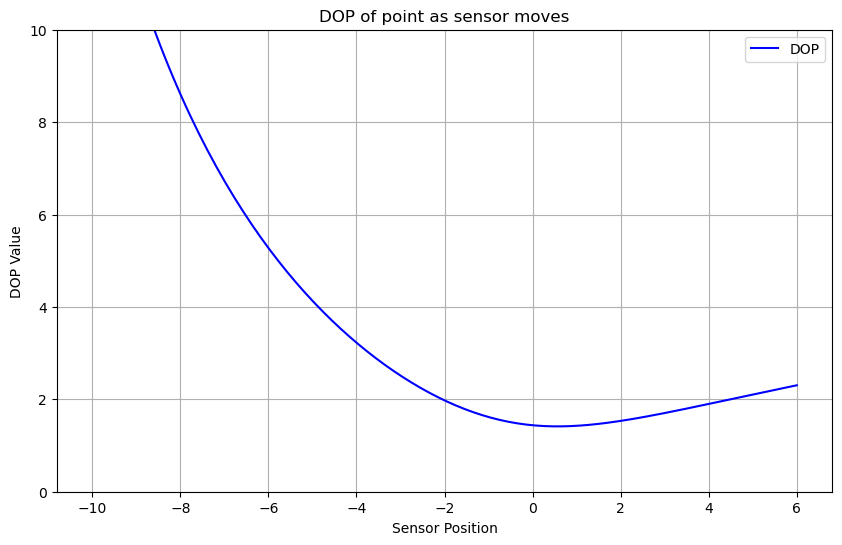

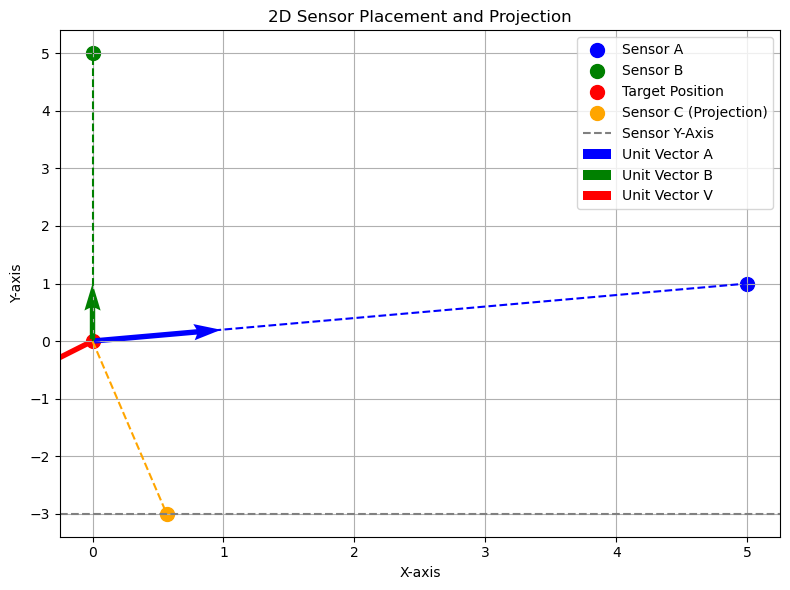

In [254]:
a = np.array([5, 1, 0.0000])
b = np.array([0, 5, 0.0001])

sensors = np.array([
    a,
    b,  # Top-left-back corner
    [-10, sensor_y_axis, 0.0]   # Top-right-back corner
])

position = np.array([0, 0, 0])  # Point to estimate
movement_matrix = np.array([
    [0, 0, 0],    # Bottom-right-front corner
    [0, 0, 0],   # Top-left-back corner
    [0.1,0 , 0]   # Top-right-back corner
])

# Call the function to plot DOP values
mindop, line_pos = plot_dop_line(position, sensors, movement_matrix, num_points=160, index_of_move=0)

projection_point = np.array([line_pos, sensor_y_axis, 0])

plot_sensor_vec_2d(a, b, third_sensor_vec, projection_point, target_pos, sensor_y_axis)
#dop = DilutionOfPrecision(sensors=sensors,bounds=Bounds, grid_resolution=2, invert_color=False, norm=False, max_color=10)

In [233]:
dop1 = DilutionOfPrecision(sensors=final_sensors,bounds=Bounds, grid_resolution=2, invert_color=False, norm=False, max_color=10)

dop_values = dop1.get_dop_values_at_point(position)
print("DOP values at target position:", dop_values)


sensors_search = np.array([a, b, projection_point])
dop_search = DilutionOfPrecision(sensors=sensors_search,bounds=Bounds, grid_resolution=2, invert_color=False, norm=False, max_color=10)

dop_values_search = dop_search.get_dop_values_at_point(position)
print("DOP values at target position:", dop_values_search)





DOP values at target position: 7.356738699557185
DOP values at target position: 1.4142210648920137


Step 1 - Min HDOP: 1.4142135623730951 at (-7.5, -5.5)
Step 2 - Min HDOP: 1.4142135623730951 at (-2.5, -7.5)
Step 3 - Min HDOP: 1.414213562373095 at (0.0, -7.0)


c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:56: RuntimeWarning: invalid value encountered in sqrt
  pdop = np.sqrt(Q[0, 0] + Q[1, 1] + Q[2, 2])
c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:57: RuntimeWarning: invalid value encountered in sqrt
  hdop = np.sqrt(Q[0, 0] + Q[1, 1])
c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:58: RuntimeWarning: invalid value encountered in sqrt
  vdop = np.sqrt(Q[2, 2])


Step 4 - Min HDOP: 1.4142135623730951 at (5.0, -3.0)
Step 5 - Min HDOP: 1.414213562373095 at (-1.5, -5.5)
Step 6 - Min HDOP: 1.4142135623730951 at (-2.5, -3.5)
Step 7 - Min HDOP: 1.4142135623730951 at (5.0, -3.0)
Step 8 - Min HDOP: 1.4142135623730951 at (5.0, -3.0)


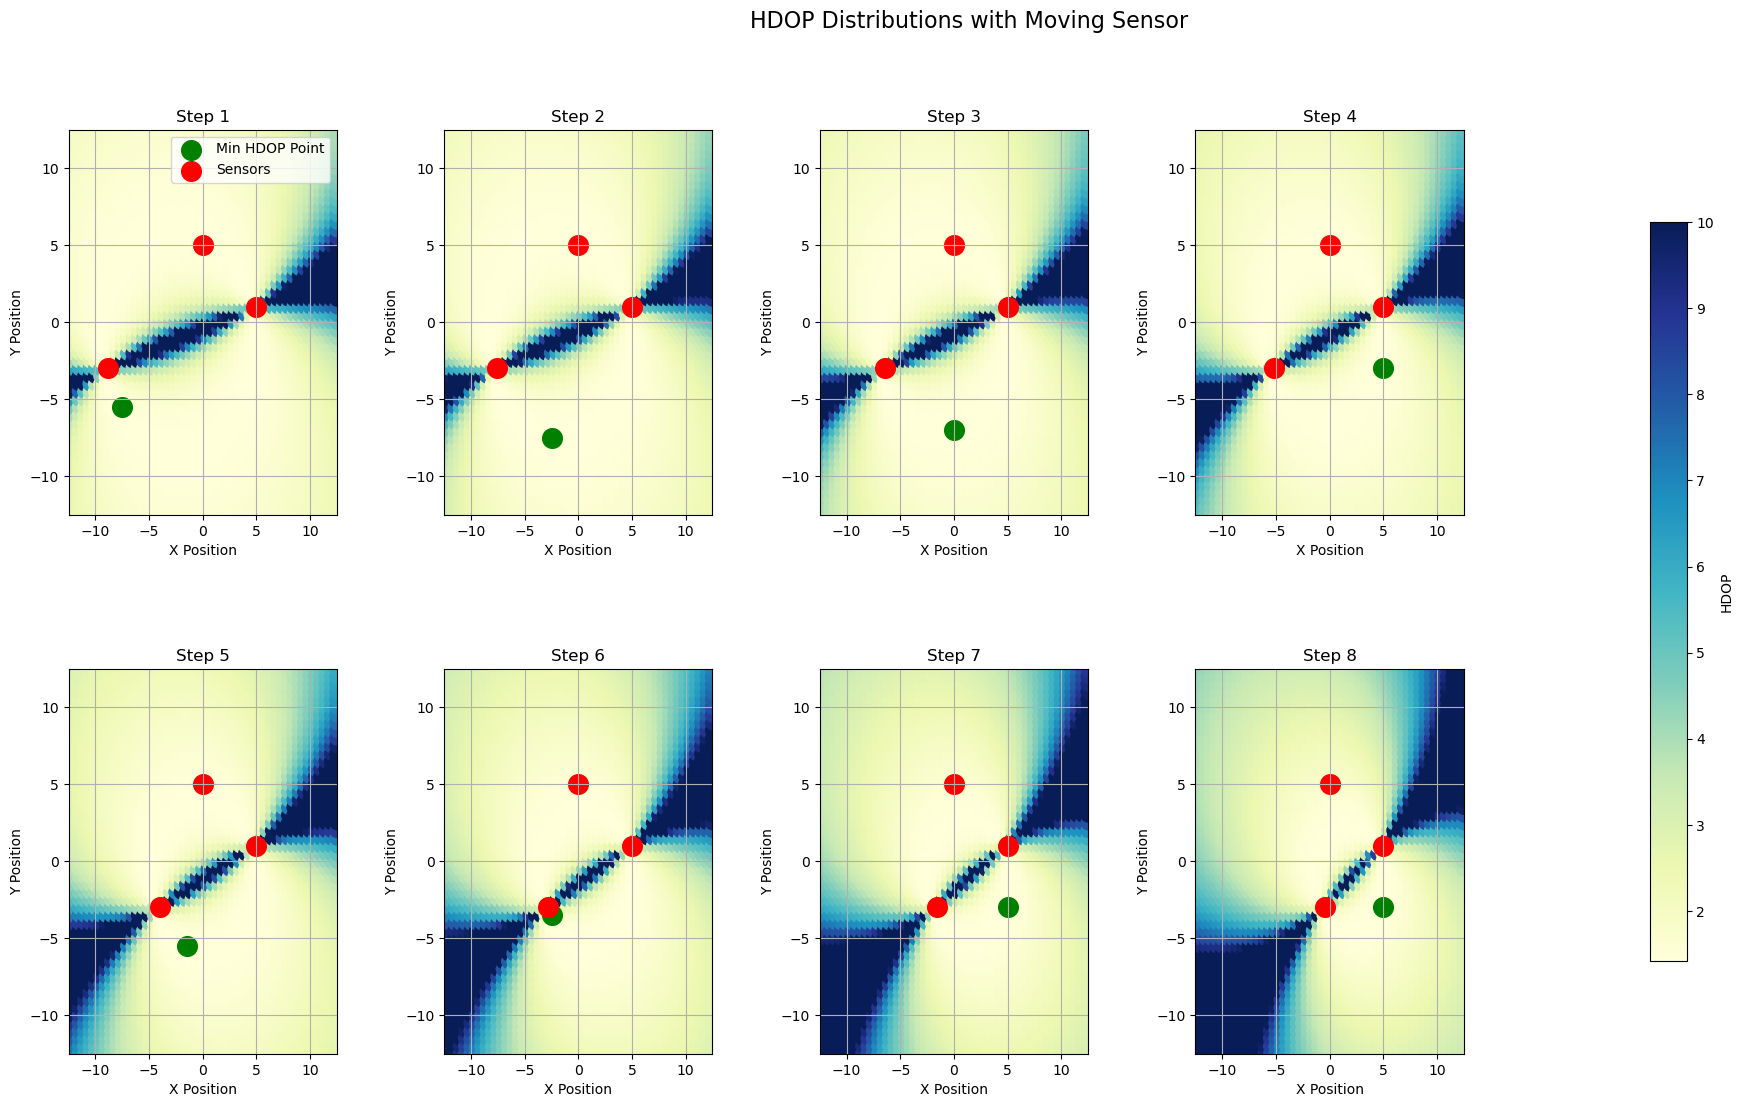

In [255]:
bound_mult = .5
x_min, x_max, y_min, y_max, z_min, z_max = -25*bound_mult, 25*bound_mult, -25*bound_mult, 25*bound_mult, -5, 20
Bounds = x_min, x_max, y_min, y_max, z_min, z_max

dop = DilutionOfPrecision(sensors=sensors,bounds=Bounds, grid_resolution=.5, invert_color=False, norm=False, max_color=10)
dop.Moving_sensor(movement_matrix*12, 8)

In [235]:

def get_nosisy_measurements(position, sensors):
   
    estimator = PNT_Estimation(sensors)
    estimator.noise_std = 0.1
    estimator.max_iterations = 1000
    estimator.tolerance = 1e-6

    #position = np.array([5,5,0])
    initial_guess = np.array([0, 0, 0])
    results = estimator.estimate_positions(position, initial_guess, 100)

    results = np.stack(results).T
    return results

Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient de

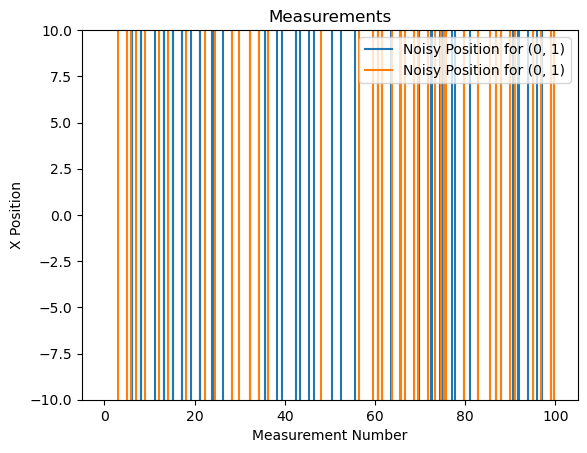

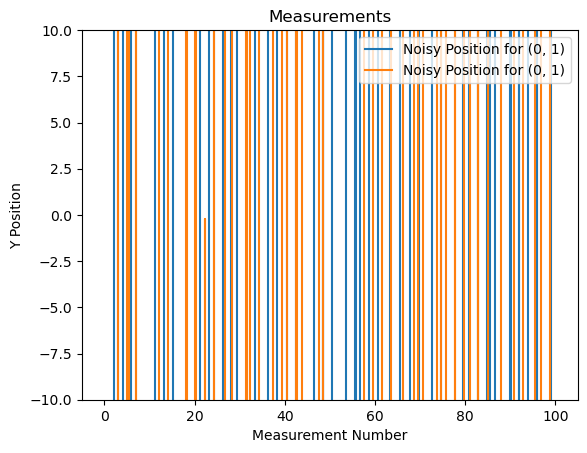

In [237]:
combined_results = []

sensor_setup = [final_sensors, sensors_search]

for sensor in sensor_setup:
    #print("Position: ", posistion)
    results = get_nosisy_measurements(target_pos, sensors)
    #print("Results: ", results)
    combined_results.append(results)


plotter = EstimationPlotting()
#print(results)
plotter.true_position = [target_pos, target_pos]
plotter.noisy_positions = combined_results


#print("Noisy positions: ", results[:][0])




linespace = np.linspace(0, 100, 100)
plotter.measurement_number = linespace
plotter.plot_measurements_X()
plotter.plot_measurements_Y()



In [ ]:

#change to just plot sensor positions and target pos in 2d with no arrows and labels at the points
def plot_test_environment(a,b,c, target_pos):
    fig, ax = plt.subplots(figsize=(8, 6))
    #create points for each sensor
    ax.scatter(a[0], a[1], color='blue', label='Sensor 1 = [x1 y1 z1]', s=100)
    ax.scatter(b[0], b[1], color='green', label='Sensor 2  = [x2 y2 z2]', s=100)
    ax.scatter(c[0], c[1], color='orange', label='Sensor 3  = [x3 y3 z3]', s=100)
    ax.scatter(target_pos[0], target_pos[1], color='red', label='Target Position', s=100)

    #put labels at the points
    ax.text(a[0], a[1], 'Sensor $S_1 = [x_1  y_1  z_1]$', fontsize=12, ha='right')
    ax.text(b[0], b[1], 'Sensor $S_2  = [x_2 & y_2 & z_2]$', fontsize=12, ha='right')
    ax.text(c[0], c[1], 'Sensor $S_3  = [x_3 y_3 z_3]$', fontsize=12, ha='right')
    ax.text(target_pos[0], target_pos[1], 'Target Position $X = [x_0 y_0 z_0]$', fontsize=12, ha='right')

    # Draw lines from target pos to each sensor
    ax.plot([target_pos[0], a[0]], [target_pos[1], a[1]], label='Distance $p_1$', color='blue', linestyle='--')
    ax.plot([target_pos[0], b[0]], [target_pos[1], b[1]], label='Distance $p_2$',color='green', linestyle='--')
    ax.plot([target_pos[0], c[0]], [target_pos[1], c[1]], label='Distance $p_3$',color='orange', linestyle='--')

    # Set limits and labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])  
    ax.set_title('2D testing environment')
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.show()

sample_sensors = np.array([
    [5, 1, 0.0000],
    [-3, 5, 0.0000],
    [3, -2, 0]
])

sample_target_pos = np.array([0, 1, 0])

plot_test_environment(sample_sensors[0], sample_sensors[1], sample_sensors[2], sample_target_pos)

ValueError: 
Distance $oe_1$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

ValueError: 
Distance $oe_1$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 800x600 with 1 Axes>

In [288]:
import matplotlib.pyplot as plt
from typing import Sequence, Tuple

def plot_test_environment(
    a: Sequence[float],
    b: Sequence[float],
    c: Sequence[float],
    target_pos: Sequence[float]
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Plot a 2D test environment with three sensors S₁, S₂, S₃ and a target X.
    Uses inline vectors [x, y, z] for full MathText compatibility.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    sensors = [
        (1, a, 'blue'),
        (2, b, 'green'),
        (3, c, 'orange'),
    ]
    for idx, coord, color in sensors:
        ax.scatter(coord[0], coord[1], color=color, s=100)
        # Inline vector with thin spaces \,
        label = '$S_{%d} = [x_{%d},y_{%d},z_{%d}]$' % (idx, idx, idx, idx)
        ax.text(coord[0], coord[1], label,
                fontsize=12, ha='right', va='bottom')

    # Target point
    ax.scatter(target_pos[0], target_pos[1], color='red', s=100)
    ax.text(
        target_pos[0], target_pos[1],
        '$X = [x_0,y_0,z_0]$',
        fontsize=12, ha='left', va='top'
    )

    # Dashed lines and distance labels
    for idx, coord, color in sensors:
        ax.plot(
            [target_pos[0], coord[0]],
            [target_pos[1], coord[1]],
            linestyle='--', color=color,
            label='$p_{%d} = || X - S_{%d}||$' % (idx, idx)
        )

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('2D Test Environment', fontweight='bold')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    return fig, ax


(<Figure size 800x600 with 1 Axes>,
 <AxesSubplot:title={'center':'2D Test Environment'}, xlabel='$x$', ylabel='$y$'>)

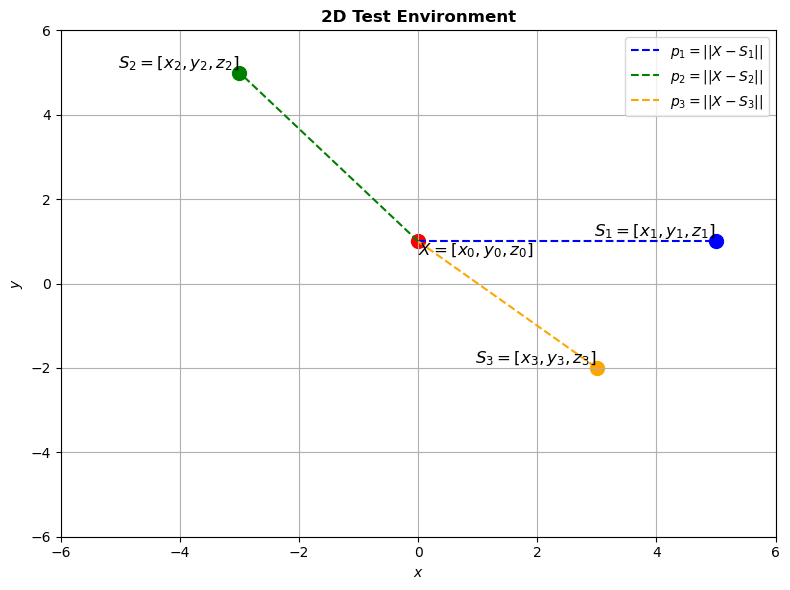

In [289]:

sample_sensors = np.array([
    [5, 1, 0.0000],
    [-3, 5, 0.0000],
    [3, -2, 0]
])

sample_target_pos = np.array([0, 1, 0])

plot_test_environment(sample_sensors[0], sample_sensors[1], sample_sensors[2], sample_target_pos)